### Importing necessary Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Read the Titanic dataset from a CSV file

In [14]:
df = pd.read_csv("C:/Users/madha/Downloads/Titanic.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### UNDERSTANDNG THE DATASET(CHECKING DATATYPES AND STRUCTURES)

In [15]:
df.info() #checking structure and datatypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.describe() #checking statistical summary


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.isnull().sum() #missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Data Cleaning

## Handling missing values

### Fill missing values in the 'Age' column with the median age and 'Embarked' column with the mode.

In [21]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



### DROP cabin column

In [ ]:
df.drop(columns=['Cabin'], inplace=True)


In [24]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

df.isnull().sum()


# Exploratory Data Analysis (EDA)

### Explore the relationships between variables and identify patterns

##### Survival count (target variable)

In [26]:
df['Survived'].value_counts() #target variable


Survived
0    549
1    342
Name: count, dtype: int64

##### Survival by Gender

In [27]:
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

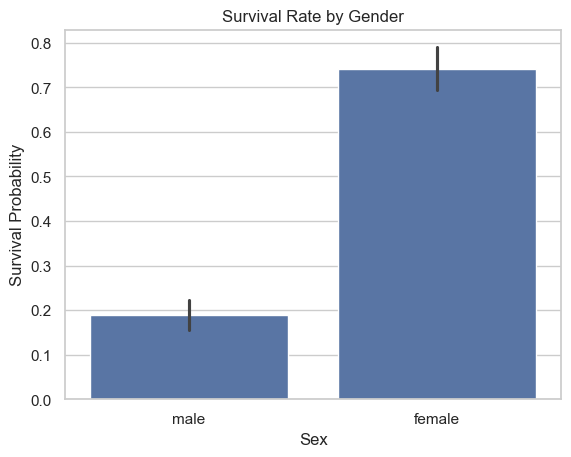

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()


#### Relationship between survival and other variables

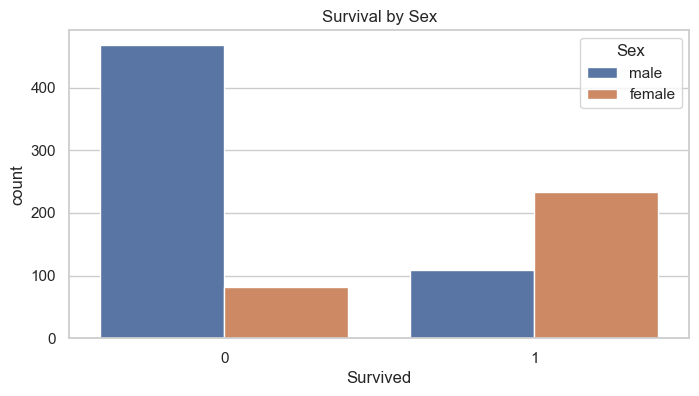

In [29]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Survival vs. sex
# This is  Seaborn code 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by Sex")
plt.show()
# Insight: Females survived more than males

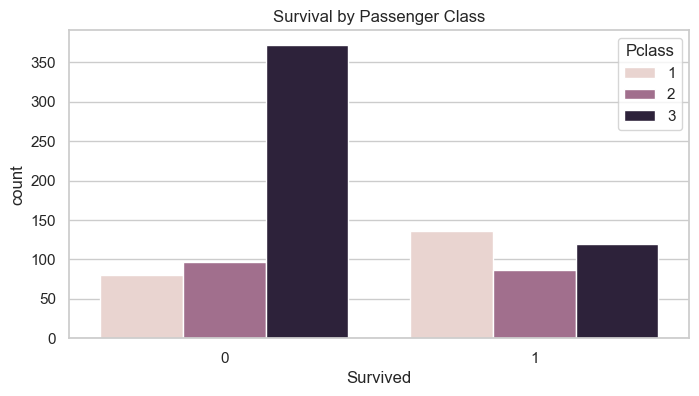

In [30]:
# Survival vs. passenger class
plt.figure(figsize=(8, 4))
sns.countplot(x="Survived", hue="Pclass", data=df)
plt.title("Survival by Passenger Class")
plt.show()
# Insight: First-class passengers had higher survival

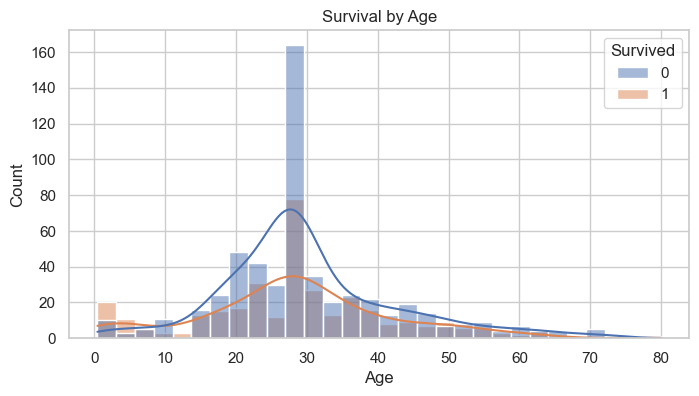

In [31]:
# Survival vs. age
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', kde=True, hue='Survived', common_norm=False)
plt.title("Survival by Age")
plt.show()
#Most passengers were between 20–40 years

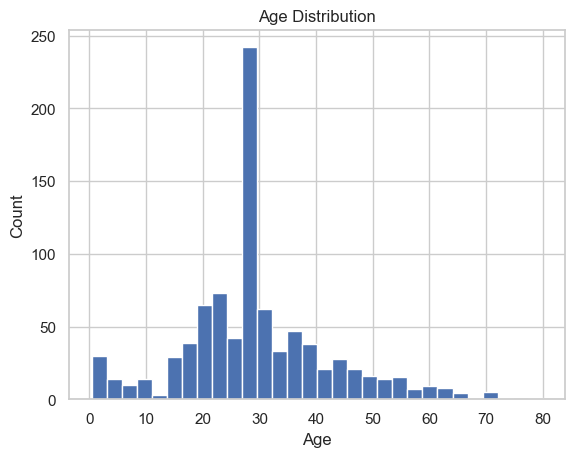

In [33]:
plt.hist(df['Age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


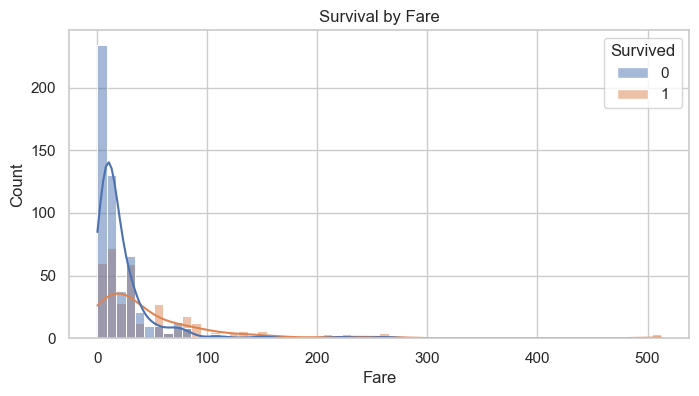

In [32]:
# Survival vs. fare
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Fare', kde=True, hue='Survived', common_norm=False)
plt.title("Survival by Fare")
plt.show()
#Insight: Higher fare → higher survival probability

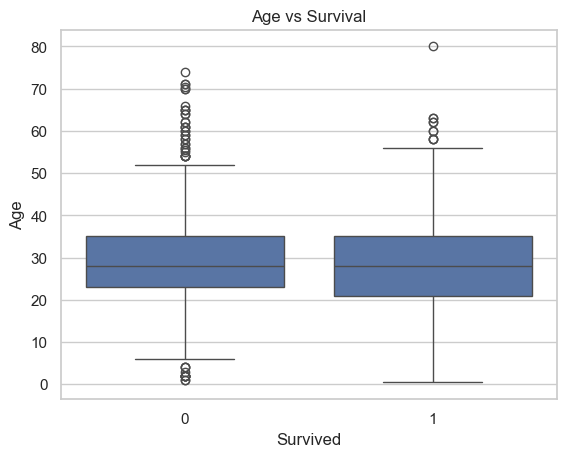

In [35]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()
# Insight: Younger passengers had slightly better survival

### Correlation Analysis

In [36]:
df.corr(numeric_only=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


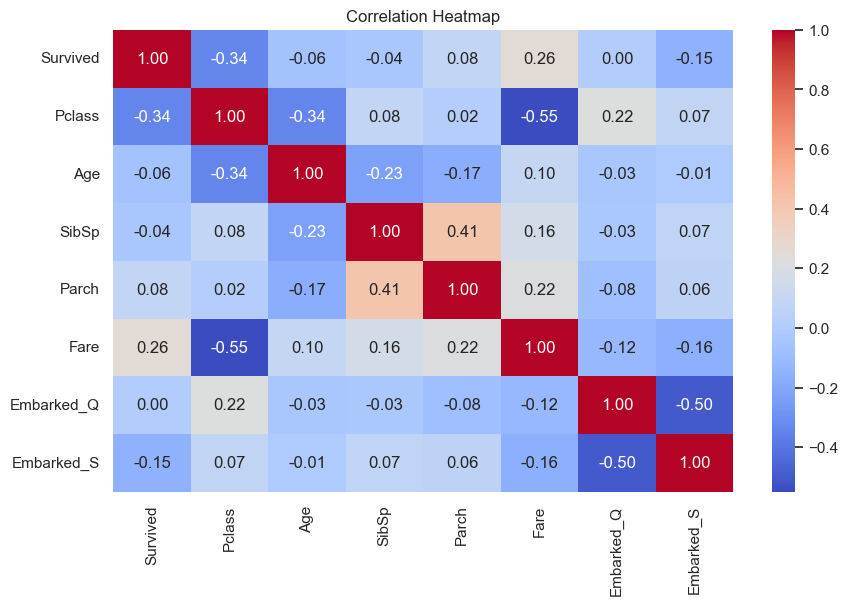

In [37]:
# One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Now, run the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()